In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import collections

In [3]:
train = pd.read_csv('../mapt/MachineLearningSolutions_Code/Chapter01/credit-risk-modelling-master/data/cs-training.csv')
test = pd.read_csv('../mapt/MachineLearningSolutions_Code/Chapter01/credit-risk-modelling-master/data/cs-test.csv')

In [4]:
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(train.columns)):
    cleancolumn.append(train.columns[i].replace('-', '').lower())
train.columns = cleancolumn

In [5]:
train.head()

,unnamed: 0,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
train.rename(columns={'unnamed: 0': 'id'},inplace=True)

In [7]:
train.shape

(150000, 12)

In [8]:
train.isnull().sum()

id                                          0
seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

In [9]:
print('Median:\n',train[train.columns].median())
print('\n')
print('Mean:\n',train[train.columns].mean())

Median:
 id                                      75000.500000
seriousdlqin2yrs                            0.000000
revolvingutilizationofunsecuredlines        0.154181
age                                        52.000000
numberoftime3059dayspastduenotworse         0.000000
debtratio                                   0.366508
monthlyincome                            5400.000000
numberofopencreditlinesandloans             8.000000
numberoftimes90dayslate                     0.000000
numberrealestateloansorlines                1.000000
numberoftime6089dayspastduenotworse         0.000000
numberofdependents                          0.000000
dtype: float64


Mean:
 id                                      75000.500000
seriousdlqin2yrs                            0.066840
revolvingutilizationofunsecuredlines        6.048438
age                                        52.295207
numberoftime3059dayspastduenotworse         0.421033
debtratio                                 353.005076
monthlyincome

In [10]:
train.seriousdlqin2yrs.value_counts() / train.shape[0] *100

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

In [11]:
train.fillna(train.median(),inplace=True)

In [12]:
train.isnull().sum()

id                                      0
seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [13]:
train.corr()

,id,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
id,1.000000,0.002801,0.002372,0.004403,-0.000571,-0.002906,0.002400,0.004586,-0.001104,-0.000666,-0.000777,0.000148
seriousdlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.017151,-0.029669,0.117175,-0.007038,0.102261,0.046869
revolvingutilizationofunsecuredlines,0.002372,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,0.004403,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.000571,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,-0.002906,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.002400,-0.017151,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,0.004586,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001104,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,-0.000666,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399


In [14]:
#sns.pairplot(train)
cols = []
def ContVars(dataFrame):
    for col in dataFrame:
        if (len(train[col].unique()) > 10):
            print("{} : {} : {} \n".format(col, train[col].nunique(), train[col].unique()))
            cols.append(col)

contCols=ContVars(train)
display(contCols)

id : 150000 : [     1      2      3 ... 149998 149999 150000] 

revolvingutilizationofunsecuredlines : 125728 : [0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295] 

age : 86 : [ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109] 

numberoftime3059dayspastduenotworse : 16 : [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11] 

debtratio : 114194 : [0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808] 

monthlyincome : 13594 : [ 9120.  2600.  3042. ... 15648.   521.  7647.] 

numberofopencreditlinesandloans : 58 : [13  4  2  5  7  3  8  9  6 10 14 22 17  1 15 31 12 21 11 19 18 26 20 23
  0 16 27 29 28 24 25 32 46 33 30 34 37 38 36 35 54 43 45 49 57 48 40 58
 5

None

#### Handling outliners

In [15]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))

#percentile_based_outlier(train.RevolvingUtilizationOfUnsecuredLines)

In [16]:
# Median Absolute deviation based outliner detection
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

mad_based_outlier(points=train.age)

array([False, False, False, ..., False, False, False])

In [17]:
# Standard Deviation based outliner detection
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

#std_div(data=training_data.age)

In [18]:
# Majority based outliner detection
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in temp:
        if i.count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

#outlierVote(data=train.age)

In [73]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict

outlierRatio(train.age)

{'percentile_based_outlier': [6543, '4.36%'],
 'mad_based_outlier': [0, '0.00%'],
 'std_div': [102197, '68.13%'],
 'outlierVote': [3515, '2.34%']}

In [19]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

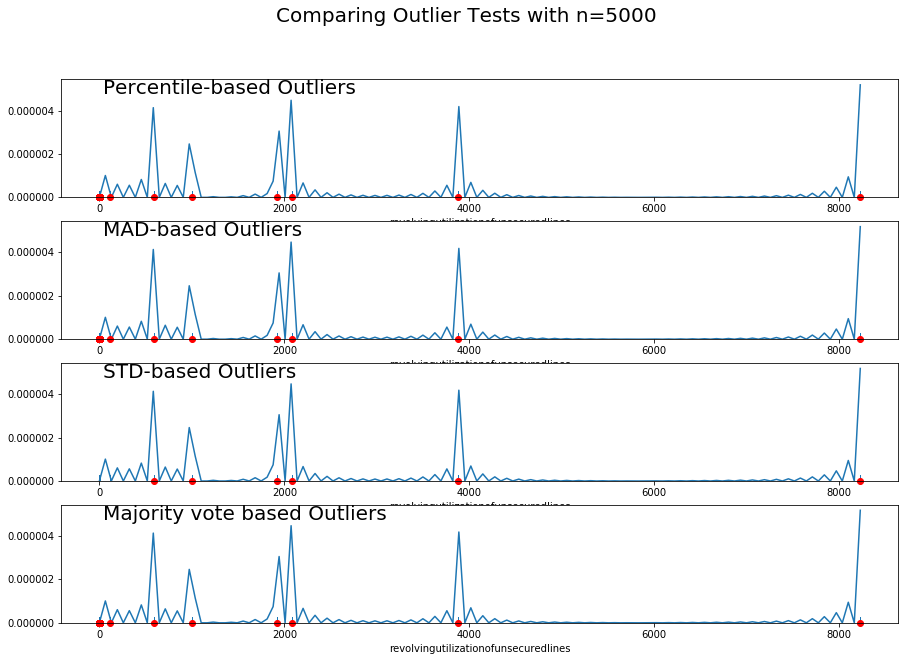

In [40]:
plotOutlier(train.revolvingutilizationofunsecuredlines.sample(5000))

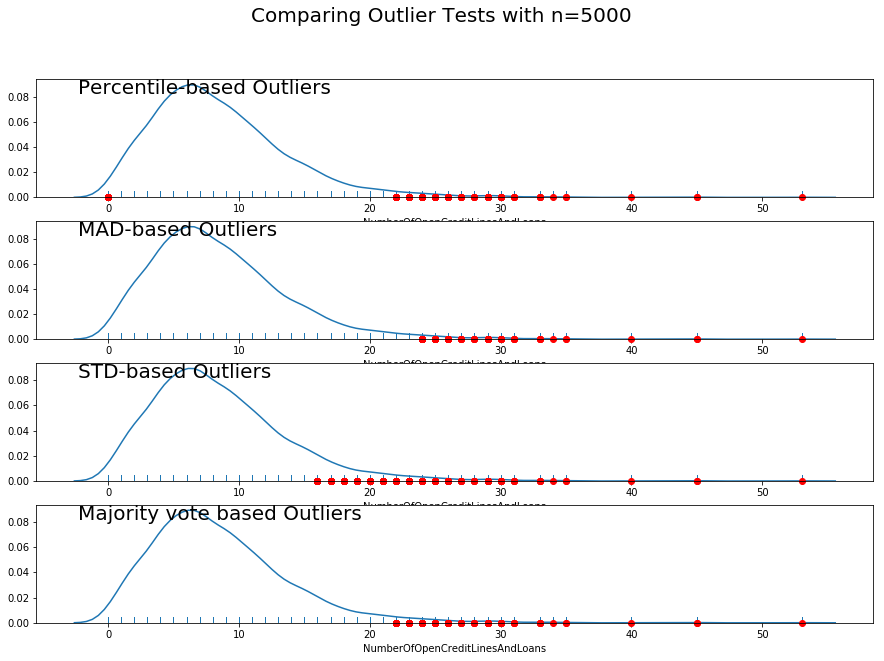

In [74]:
plotOutlier(train.NumberOfOpenCreditLinesAndLoans.sample(5000))

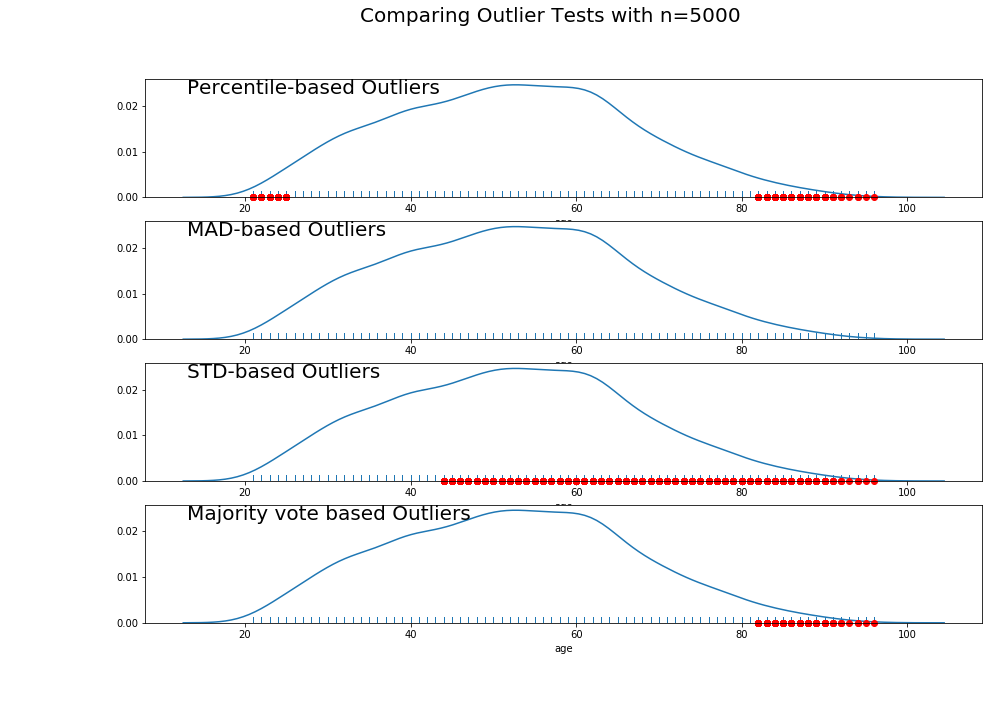

In [75]:
plotOutlier(train.age.sample(5000))

In [86]:
collections.Counter(train.age.sort_values())

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

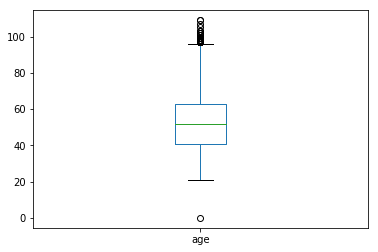

In [109]:
train.age.plot.box()

In [66]:
revNew = []
for val in train.revolvingutilizationofunsecuredlines.values:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)

train['revolvingutilizationofunsecuredlines'] = revNew

In [67]:
ageNew = []
for val in train.age.values:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
train.age = ageNew

In [69]:
collections.Counter(train.numberoftime3059dayspastduenotworse.sort_values(ascending=True))

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [71]:
new = []
med = train.numberoftime3059dayspastduenotworse.median()
for val in train.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        new.append(med)
    else:
        new.append(val)

train.numberoftime3059dayspastduenotworse = new